
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for balck-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1,0,1,0,0,0,0,0,0,
1,b,1,3,3,6,0,1,1,0,316,...,1,0,1,0,0,0,0,0,0,
2,b,1,4,1,6,0,0,0,0,19,...,1,0,1,0,0,0,0,0,0,
3,b,1,3,4,6,0,1,0,1,313,...,1,0,1,0,0,0,0,0,0,
4,b,1,3,3,22,0,0,0,0,313,...,1,1,0,0,0,0,0,1,0,Nonprofit


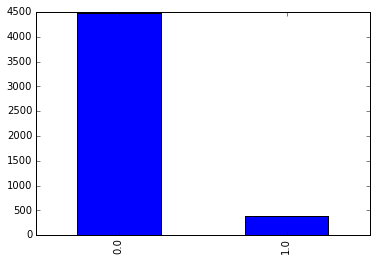

In [12]:
df = data[['race', 'call']]
df.head()
%matplotlib inline
df.call.value_counts().plot(kind='bar')

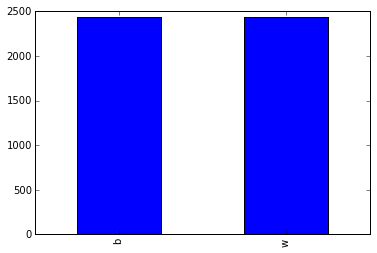

In [14]:
df.race.value_counts().plot(kind='bar')

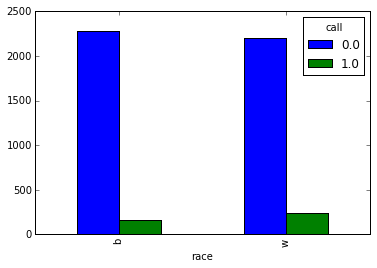

In [17]:
g = df.groupby(['race', 'call']).size()
g.unstack().plot(kind='bar')

In [50]:
g

race  call
b     0       2278
      1        157
w     0       2200
      1        235
dtype: int64

In [46]:
observed = g.unstack('race').as_matrix()
observed

array([[2278, 2200],
       [ 157,  235]], dtype=int64)

#Q1: What test is appropriate for this problem? Does CLT apply?

1. Chi-square test for contingency table is appropriate for this problem as our only outcome here is a binary response 'call'. 
2. CLT still applys. for large sample size, the log-transformation of outcome is still normall distributed.

#Q2: What are the null and alternate hypotheses?
1. null hypothesis: receiving a call from employer is independent of race
2. alternative hypothesis: receiving a call from employer is dependent on race.

#Q4: Discuss statistical significance.
1. p value of chi-square test is less than 0.00 less than significace level 0.01, we therefore reject the null hypothesis that race is independent of the call for interviewing. 

In [37]:
chi2, p, ddof, expected = stats.chi2_contingency(observed, correction = True)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 16.4490285842
p-value: 4.99757838996e-05
Degrees of Freedom: 1

[[ 2239.  2239.]
 [  196.   196.]]


#Q3: Compute margin of error, confidence interval, and p-value.
1. error: 0.10732321704947324
2. confidence interval: (5.88, 6.31)
3. p-value: 4.99757838996e-05

In [53]:
#compute odds ratio
LOR = np.log(observed[0,0]) + np.log(observed[1,1]) - np.log(np.log(observed[0,1])) - np.log(observed[1,0])
LOR

6.0936645099685673

In [55]:
#compute standard error
SE = np.sqrt(np.sum(1/observed.astype(np.float64)))
SE

0.10732321704947324

In [67]:
## 95% confidence intervals
LCL = LOR - 2*SE
UCL = LOR + 2*SE
print "The confidence interval is between %.2f and %.2f" % (LCL, UCL)

The confidence interval is between 5.88 and 6.31
